In [3]:
import numpy as np
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [7]:
model = Sequential([
    Dense(70, activation='relu', input_shape=(784,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')                    
])

C:\Users\musai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=30, validation_split=0.2)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8249 - loss: 0.5684 - val_accuracy: 0.9531 - val_loss: 0.1624
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9521 - loss: 0.1560 - val_accuracy: 0.9597 - val_loss: 0.1368
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9672 - loss: 0.1066 - val_accuracy: 0.9672 - val_loss: 0.1165
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9757 - loss: 0.0803 - val_accuracy: 0.9686 - val_loss: 0.1093
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9799 - loss: 0.0658 - val_accuracy: 0.9672 - val_loss: 0.1181
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0553 - val_accuracy: 0.9679 - val_loss: 0.1142
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0408 - val_accuracy: 0.9721 - val_loss: 0.1016
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0361 - 

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.2019        
Test accuracy: 0.9711


In [11]:
model.save("mnist_model.keras")
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


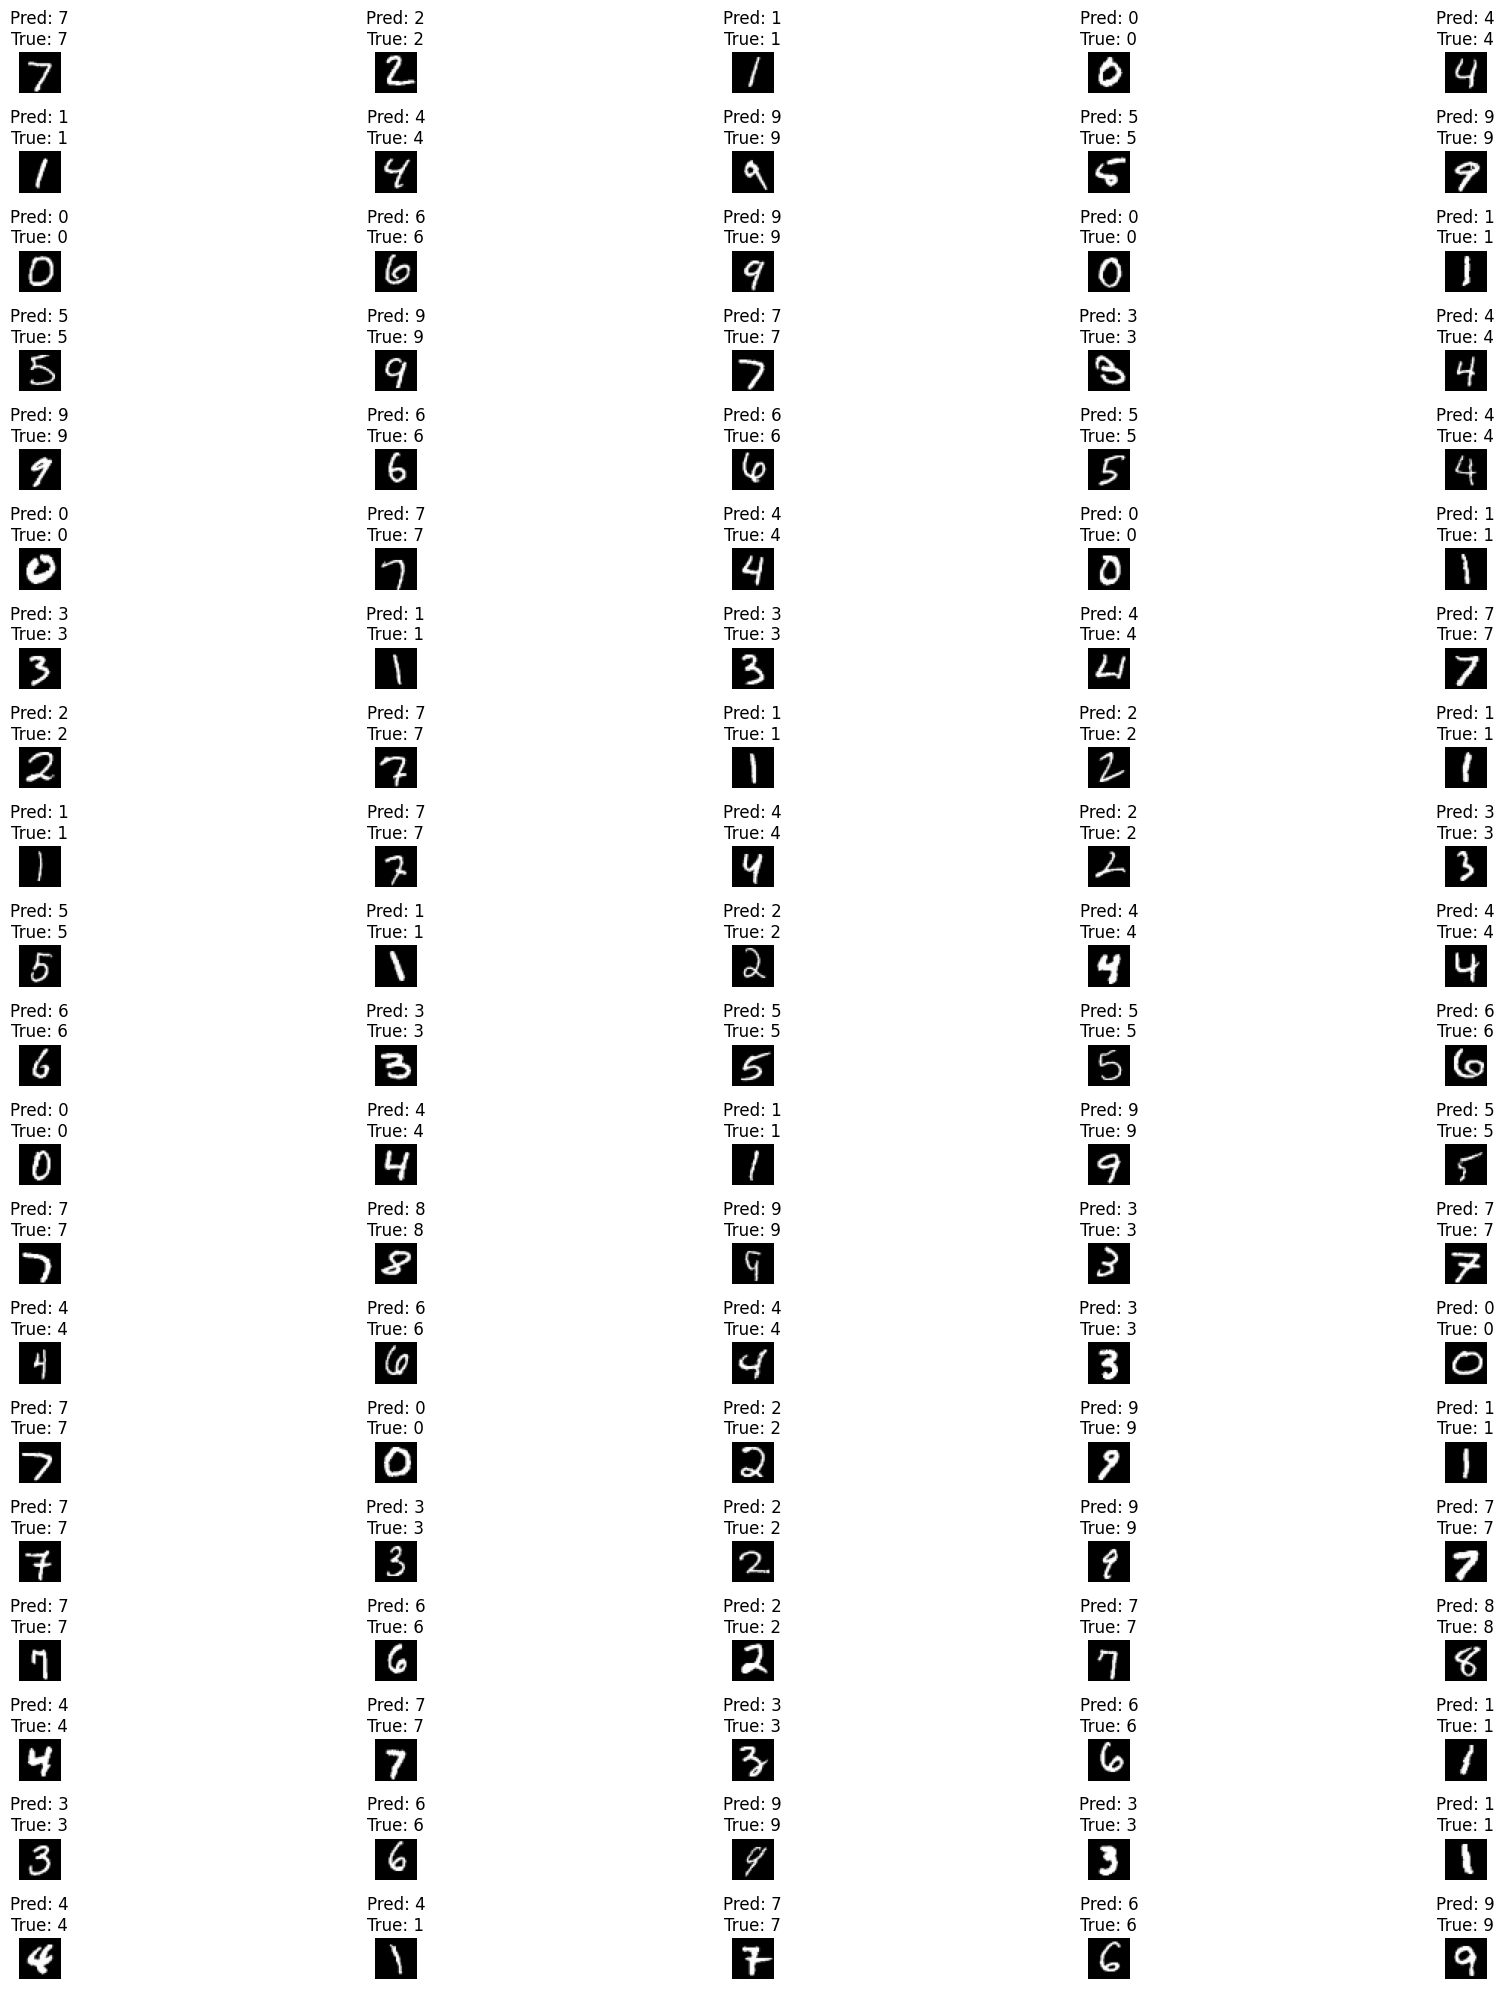

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(20, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig("mnist_pred_50_30_RELU+sigmoid.png", dpi=500)
plt.show()

////Self Test////

In [13]:
from PIL import Image

In [14]:
image_path = "phototest_two.png"  
custom_image = Image.open(image_path).convert('L')
custom_image = custom_image.resize((28, 28))

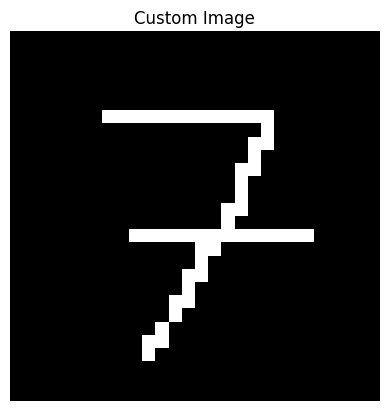

In [15]:
plt.imshow(custom_image, cmap='gray')
plt.title("Custom Image")
plt.axis('off')
plt.show()

In [17]:
custom_image_array = np.array(custom_image).astype('float32') / 255 
custom_image_array = custom_image_array.reshape(1, -1)

In [18]:
custom_prediction = model.predict(custom_image_array)
custom_predicted_label = np.argmax(custom_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [19]:
print(f"Predicted label: {custom_predicted_label}")
print("Prediction probabilities:", custom_prediction)

Predicted label: 7
Prediction probabilities: [[4.8453890e-13 1.0370081e-11 9.3491309e-08 1.0151807e-06 2.4103186e-09
  1.1593604e-14 1.4380065e-14 9.9999881e-01 6.8387667e-13 1.0125752e-09]]
